In [1]:
from itertools import product
import numpy as np
import plotly.graph_objects


In [2]:
mydefault = plotly.graph_objects.layout.Template()
mydefault.layout.xaxis.showgrid = False
mydefault.layout.yaxis.showgrid = False
mydefault.layout.xaxis.showline = True
mydefault.layout.yaxis.showline = True
mydefault.layout.yaxis.linewidth = 2
mydefault.layout.xaxis.ticks = "outside"
mydefault.layout.yaxis.ticks = "outside"
mydefault.layout.hovermode = False
mydefault.layout.scene.hovermode = False
mydefault.layout.xaxis.showspikes = False
mydefault.layout.yaxis.showspikes = False
mydefault.layout.scene.xaxis.showspikes = False
mydefault.layout.scene.yaxis.showspikes = False
mydefault.layout.scene.zaxis.showspikes = False
plotly.io.templates["mydefault"] = mydefault
plotly.io.templates.default = "mydefault"


**Learning goals:**

- Know the four defining properties of chaos in a dynamical system. 
- Be able to explain what each one of them means. 


**Example:** The three-species food chain model (the Hastings model)

In [3]:
state_vars = list(var("G, S, W"))
system = (
    G*(1 - G/3) - 2.5*G/(1 + G)*S, 
    2/3*2.5*G/(1 + G)*S - 0.4*S - 0.1*S/(1 + S)*W, 
    0.5*0.1*S/(1 + S)*W - 0.01*W, 
)
vectorfield(G, S, W) = system
delta_t = 0.1
t_range = srange(0, 5000, delta_t)
initial_state = (1, 1, 1)
solution = desolve_odeint(vectorfield, initial_state, t_range, state_vars)
solution = np.insert(solution, 0, t_range, axis=1)[int(2000/delta_t):]


In [4]:
end = int(1000/delta_t) + 1
fig = plotly.subplots.make_subplots(rows=int(1), cols=int(2), specs=[[{}, {"type": "scene"}]])
fig.layout.width = 900
fig.layout.height = 450
fig.layout.margin = dict(l=40, r=0, t=0, b=40)
fig.layout.yaxis.rangemode = "nonnegative"
fig.layout.xaxis.title.text = "t"
fig.layout.yaxis.title.text = "Populations"
fig.layout.scene.xaxis.title.text = "G (grass)"
fig.layout.scene.yaxis.title.text = "S (sheep)"
fig.layout.scene.zaxis.title.text = "W (wolves)"
fig.layout.scene.aspectmode = 'cube'
fig.add_scatter(row=int(1), col=int(1), x=solution[:end,0], y=solution[:end,1], mode="lines", 
                line_color="darkgreen", line_width=1, name="G (grass)")
fig.add_scatter(row=int(1), col=int(1), x=solution[:end,0], y=solution[:end,2], mode="lines", 
                line_color="darkgray",  line_width=1, name="S (sheep)")
fig.add_scatter(row=int(1), col=int(1), x=solution[:end,0], y=solution[:end,3], mode="lines", 
                line_color="black",     line_width=1, name="W (wolves)")
fig.update_layout(scene_aspectmode = 'cube', 
                  scene_xaxis_title_text = "G (grass)", 
                  scene_yaxis_title_text = "S (sheep)", 
                  scene_zaxis_title_text = "W (wolves)")
fig.add_scatter3d(row=int(1), col=int(2), x=solution[:,1], y=solution[:,2], z=solution[:,3], 
                  mode="lines", line_color="red", name="Trajectory")
fig.show()


**Example:** The discrete-time logistic model

In [5]:
X_next(X) = 4*X*(1 - X)
X_list = [0.7]
t_list = srange(1000)
for t in t_list:
    X_list.append(X_next(X_list[-1]))
list_of_points = list(zip(t_list, X_list))


In [6]:
@interact(connect=checkbox(False, label="Connect the dots"))
def update(connect):
    p = list_plot(list_of_points[:50], color="blue", size=30)
    if connect:
        p += list_plot(list_of_points[:50], plotjoined=True, color="gray")
    p.show(axes_labels=("$t$", "$X$"), aspect_ratio=0.4*50/1, figsize=8)


Interactive function <function update at 0x7f1f0a02dea0> with 1 widget
  connect: Checkbox(value=False, descri…

**Definition:** A mathematical model has ***chaotic*** behavior if it has the following four properties: 
1. The model is ***deterministic***. 
2. The behavior is ***bounded***. 
3. The behavior is ***irregular*** (or ***aperiodic***). 
4. The behavior has ***sensitive dependence on initial conditions***. 

**Properties of chaos:**

1. The model is ***deterministic***. 

<div style="font-size: smaller">

Recall that this means that (at least *in theory*) the current state determines all future states. In short, there is no randomness in the model. 

Note that this is a property of the mathematical *model*, not a property of the *behavior*. 

All models that we have studied and will ever study in LS 30 are deterministic. Models that are not deterministic are called “stochastic”, a fancy word for random. 
</div>

**Properties of chaos:**

2. The behavior is ***bounded***. 

<div style="font-size: smaller">
This means none of the state variables “goes to infinity” (nor to $-\infty$). 

Or, in other words, there is some bounding box that can be drawn in the state space, so that a trajectory that starts inside that box will remain inside it. 
</div>

**Example:** The amount of grass is ***bounded***. 

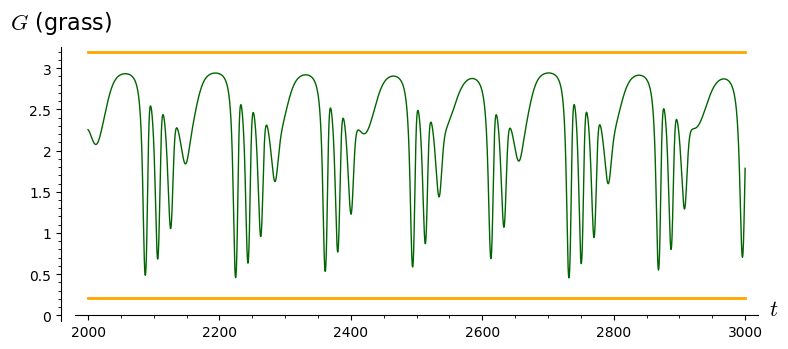

In [7]:
mins = solution.min(axis=0)
maxs = solution.max(axis=0)
mins, maxs = mins - (maxs - mins) * 0.1, maxs + (maxs - mins) * 0.1
mins *= mins > 0
end = int(1000/delta_t) + 1
tmin = solution[0,0]
tmax = solution[end - 1,0]

p  = list_plot(solution[:end,(0,1)], plotjoined=True, color="darkgreen")
p += line(((tmin, mins[1]), (tmax, mins[1])), color="orange", thickness=2)
p += line(((tmin, maxs[1]), (tmax, maxs[1])), color="orange", thickness=2)
p.show(ymin=0, axes_labels=("$t$", "$G$ (grass)"), aspect_ratio=0.4*1000/maxs[1], figsize=8)


**Example:** The sheep population is ***bounded***. 

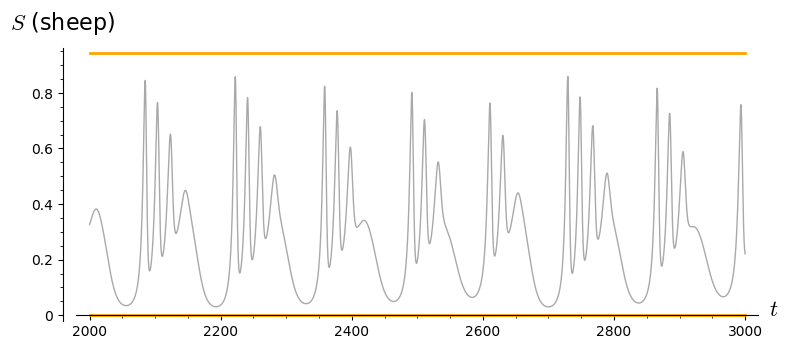

In [8]:
p  = list_plot(solution[:end,(0,2)], plotjoined=True, color="darkgray")
p += line(((tmin, mins[2]), (tmax, mins[2])), color="orange", thickness=2)
p += line(((tmin, maxs[2]), (tmax, maxs[2])), color="orange", thickness=2)
p.show(ymin=0, axes_labels=("$t$", "$S$ (sheep)"), aspect_ratio=0.4*1000/maxs[2], figsize=8)


**Example:** The wolf population is ***bounded***. 

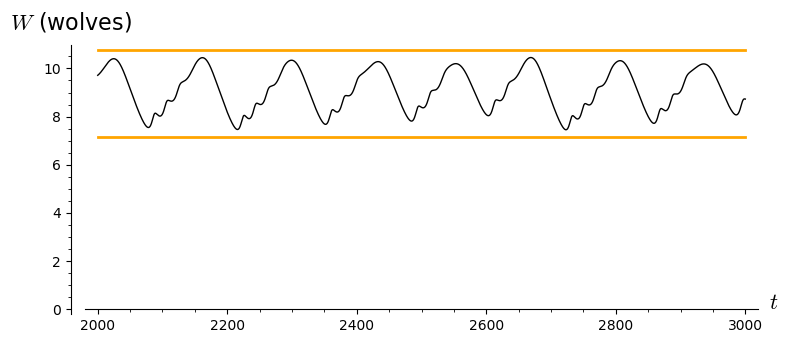

In [9]:
p  = list_plot(solution[:end,(0,3)], plotjoined=True, color="black")
p += line(((tmin, mins[3]), (tmax, mins[3])), color="orange", thickness=2)
p += line(((tmin, maxs[3]), (tmax, maxs[3])), color="orange", thickness=2)
p.show(ymin=0, axes_labels=("$t$", "$W$ (wolves)"), aspect_ratio=0.4*1000/maxs[3], figsize=8)


**Example:** The whole trajectory is ***bounded***. 

In [10]:
vertices = np.array(list(product(*zip(mins[1:], maxs[1:]))) + [(NaN, NaN, NaN)])
box = vertices[(0,1, 8, 0,2, 8, 1,3, 8, 2,3, 8, 4,5, 8, 4,6, 8, 
                5,7, 8, 6,7, 8, 0,4, 8, 1,5, 8, 2,6, 8, 3,7),:]

fig = plotly.graph_objects.Figure()
fig.layout.width = 800
fig.layout.height = 700
fig.layout.showlegend = False
fig.layout.scene.aspectmode = 'cube'
fig.layout.scene.xaxis.title.text = "G (grass)"
fig.layout.scene.yaxis.title.text = "S (sheep)"
fig.layout.scene.zaxis.title.text = "W (wolves)"
fig.add_scatter3d(x=solution[:,1], y=solution[:,2], z=solution[:,3], 
                  mode="lines", line_color="red")
fig.add_scatter3d(x=box[:,0], y=box[:,1], z=box[:,2], mode="lines", line_color="orange")
fig.show()


**Example:** The behavior of the discrete-time logistic model is ***bounded***. 

In [11]:
@interact(connect=checkbox(False, label="Connect the dots"))
def update(connect):
    p = list_plot(list_of_points[:51], color="blue", size=30)
    if connect:
        p += list_plot(list_of_points[:51], plotjoined=True, color="gray")
    p += line(((0,0), (50,0)), color="orange", thickness=2)
    p += line(((0,1.05), (50,1.05)), color="orange", thickness=2)
    p.show(axes_labels=("$t$", "$X$"), aspect_ratio=0.4*50/1, figsize=8)


Interactive function <function update at 0x7f1f09e729d8> with 1 widget
  connect: Checkbox(value=False, descri…

**Properties of chaos:**

3. The behavior is ***irregular*** (or ***aperiodic***). 

<div style="font-size: smaller">

This means that a typical trajectory never repeats itself, *nor* does it asymptotically approach a periodic cycle. 

Note that, together with *deterministic*, this means that a trajectory will never reach the same exact state twice. Or, in other words, it does not form a closed loop in the state space. 
</div>

**Example:** The populations in the three-species food chain are ***irregular (aperiodic)***. 

In [12]:
@interact(start=slider(2000, 4000, 500, default=2000, label="Start time:"))
def update(start):
    start = int((start - solution[0,0])/delta_t)
    end = start + int(1000/delta_t) + 1
    p  = list_plot(solution[start:end,(0,1)], plotjoined=True, color="darkgreen", legend_label="$G$ (grass)")
    p += list_plot(solution[start:end,(0,2)], plotjoined=True, color="darkgray",  legend_label="$S$ (sheep)")
    p += list_plot(solution[start:end,(0,3)], plotjoined=True, color="black",     legend_label="$W$ (wolves)")
    p.show(ymin=0, axes_labels=("$t$", "Populations"), aspect_ratio=0.4*1000/maxs[3], figsize=8)


Interactive function <function update at 0x7f1f09e72ae8> with 1 widget
  start: TransformIntSlider(value=2000,…

**Example:** The discrete-time logistic model is ***irregular***. 

In [13]:
@interact(connect=checkbox(False, label="Connect the dots"))
def update(connect):
    p = list_plot(list_of_points[500:1000], color="blue", size=30)
    if connect:
        p += list_plot(list_of_points[500:1000], plotjoined=True, color="gray")
    p.show(axes_labels=("$t$", "$X$"), aspect_ratio=0.4*500/1, figsize=8)


Interactive function <function update at 0x7f1f09c73158> with 1 widget
  connect: Checkbox(value=False, descri…

**Properties of chaos:**

4. The behavior has ***sensitive dependence on initial conditions***. 

<div style="font-size: smaller">

This means that making a *tiny* change in the initial state will result in *much bigger* changes in the long run. 

Colloquially, this is often referred to as the **butterfly effect**: the tiny air currents produced by a butterfly flapping its wings today in Sri Lanka can affect entire weather systems months from now in Kansas, halfway around the world from Sri Lanka. 
</div>

**Example:** ***Sensitive dependence on initial conditions*** in the grass

Solution 1's initial state: (2.25, 0.33, 9.72)
Solution 2's initial state: (2.25, 0.33, 9.73)


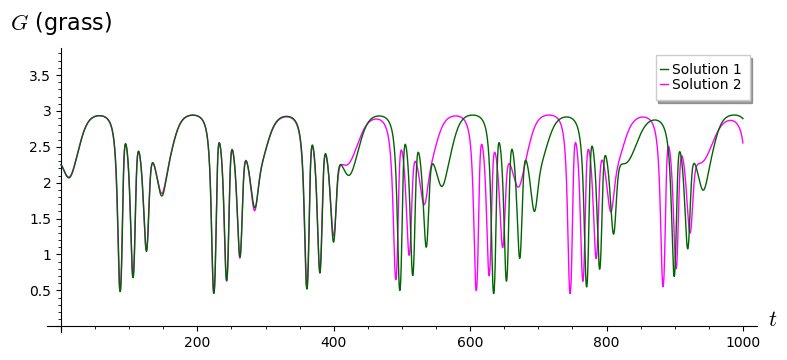

In [14]:
initial_state1 = solution[0,1:].round(2)
initial_state2 = initial_state1 + (0, 0, 0.01)
t_range = srange(0, 1000, 0.1)
solution1 = desolve_odeint(vectorfield, initial_state1, t_range, state_vars)
solution2 = desolve_odeint(vectorfield, initial_state2, t_range, state_vars)
solution1 = np.insert(solution1, 0, t_range, axis=1)
solution2 = np.insert(solution2, 0, t_range, axis=1)
print("Solution 1's initial state: {}".format(vector(initial_state1)))
print("Solution 2's initial state: {}".format(vector(initial_state2)))
p  = list_plot(solution1[:,(0,1)], plotjoined=True, color="darkgreen", legend_label="Solution 1", zorder=3)
p += list_plot(solution2[:,(0,1)], plotjoined=True, color="fuchsia",   legend_label="Solution 2")
p.show(ymin=0, ymax=3.8, axes_labels=("$t$", "$G$ (grass)"), aspect_ratio=0.4*1000/3.8, figsize=8)


**Example:** ***Sensitive dependence on initial conditions*** in the sheep

Solution 1's initial state: (2.25, 0.33, 9.72)
Solution 2's initial state: (2.25, 0.33, 9.73)


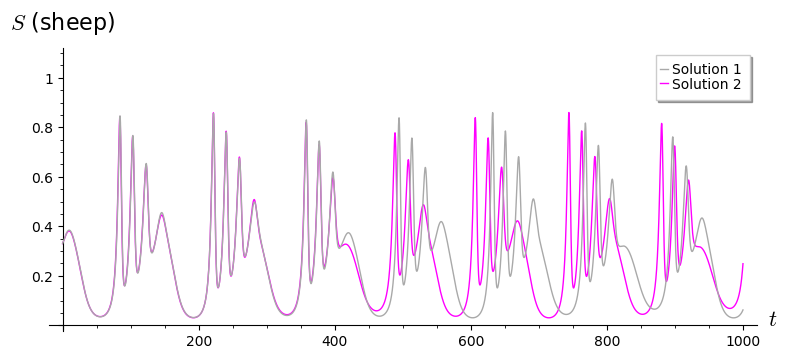

In [15]:
print("Solution 1's initial state: {}".format(vector(initial_state1)))
print("Solution 2's initial state: {}".format(vector(initial_state2)))
p  = list_plot(solution1[:,(0,2)], plotjoined=True, color="darkgray", legend_label="Solution 1", zorder=3)
p += list_plot(solution2[:,(0,2)], plotjoined=True, color="fuchsia",  legend_label="Solution 2")
p.show(ymin=0, ymax=1.1, axes_labels=("$t$", "$S$ (sheep)"), aspect_ratio=0.4*1000/1.1, figsize=8)


**Example:** ***Sensitive dependence on initial conditions*** in the wolves

Solution 1's initial state: (2.25, 0.33, 9.72)
Solution 2's initial state: (2.25, 0.33, 9.73)


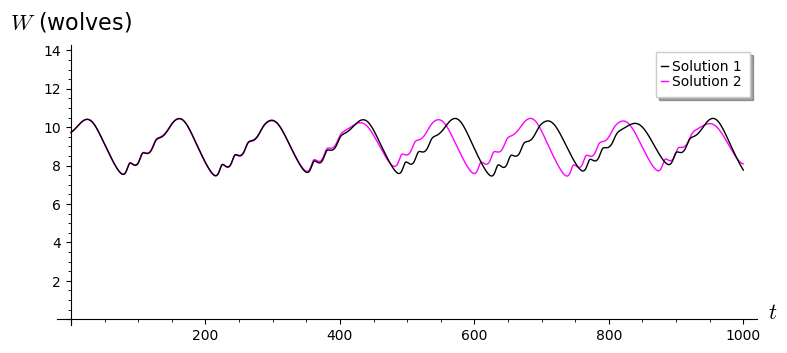

In [16]:
print("Solution 1's initial state: {}".format(vector(initial_state1)))
print("Solution 2's initial state: {}".format(vector(initial_state2)))
p  = list_plot(solution1[:,(0,3)], plotjoined=True, color="black",   legend_label="Solution 1", zorder=3)
p += list_plot(solution2[:,(0,3)], plotjoined=True, color="fuchsia", legend_label="Solution 2")
p.show(ymin=0, ymax=14, axes_labels=("$t$", "$W$ (wolves)"), aspect_ratio=0.4*1000/14, figsize=8)


**Example:** ***Sensitive dependence on initial conditions*** in the grass

In [16]:
initial_state1 = solution[0,1:].round(6)
initial_state2 = initial_state1 + (0.000001, 0, 0)
t_range = srange(0, 5000, 0.1)
solution1 = desolve_odeint(vectorfield, initial_state1, t_range, state_vars)
solution2 = desolve_odeint(vectorfield, initial_state2, t_range, state_vars)
solution1 = np.insert(solution1, 0, t_range, axis=1)
solution2 = np.insert(solution2, 0, t_range, axis=1)

print("Solution 1's initial state: {}".format(vector(initial_state1)))
print("Solution 2's initial state: {}".format(vector(initial_state2)))
@interact(start=slider(0, 4000, 1000, default=0, label="Start time:"))
def update(start):
    start = int(start/delta_t)
    end = start + int(1000/delta_t) + 1
    p  = list_plot(solution1[start:end,(0,1)], plotjoined=True, color="darkgreen", 
                   legend_label="Solution 1", zorder=3)
    p += list_plot(solution2[start:end,(0,1)], plotjoined=True, color="fuchsia", 
                   legend_label="Solution 2")
    p.show(ymin=0, ymax=3.8, axes_labels=("$t$", "$G$ (grass)"), aspect_ratio=0.4*1000/3.8, figsize=8)


Solution 1's initial state: (2.252963, 0.326469, 9.715046)
Solution 2's initial state: (2.252964, 0.326469, 9.715046)


Interactive function <function update at 0x7f1f09c738c8> with 1 widget
  start: TransformIntSlider(value=0, de…

**Example:** ***Sensitive dependence on initial conditions*** in the sheep

In [17]:
print("Solution 1's initial state: {}".format(vector(initial_state1)))
print("Solution 2's initial state: {}".format(vector(initial_state2)))
@interact(start=slider(0, 4000, 1000, default=0, label="Start time:"))
def update(start):
    start = int(start/delta_t)
    end = start + int(1000/delta_t) + 1
    p  = list_plot(solution1[start:end,(0,2)], plotjoined=True, color="darkgray", 
                   legend_label="Solution 1", zorder=3)
    p += list_plot(solution2[start:end,(0,2)], plotjoined=True, color="fuchsia", 
                   legend_label="Solution 2")
    p.show(ymin=0, ymax=1.1, axes_labels=("$t$", "$S$ (sheep)"), aspect_ratio=0.4*1000/1.1, figsize=8)


Solution 1's initial state: (2.252963, 0.326469, 9.715046)
Solution 2's initial state: (2.252964, 0.326469, 9.715046)


Interactive function <function update at 0x7f1f09c73268> with 1 widget
  start: TransformIntSlider(value=0, de…

**Example:** ***Sensitive dependence on initial conditions*** in the wolves

In [18]:
print("Solution 1's initial state: {}".format(vector(initial_state1)))
print("Solution 2's initial state: {}".format(vector(initial_state2)))
@interact(start=slider(0, 4000, 1000, default=0, label="Start time:"))
def update(start):
    start = int(start/delta_t)
    end = start + int(1000/delta_t) + 1
    p  = list_plot(solution1[start:end,(0,3)], plotjoined=True, color="black", 
                   legend_label="Solution 1", zorder=3)
    p += list_plot(solution2[start:end,(0,3)], plotjoined=True, color="fuchsia", 
                   legend_label="Solution 2")
    p.show(ymin=0, ymax=14, axes_labels=("$t$", "$W$ (wolves)"), aspect_ratio=0.4*1000/14, figsize=8)


Solution 1's initial state: (2.252963, 0.326469, 9.715046)
Solution 2's initial state: (2.252964, 0.326469, 9.715046)


Interactive function <function update at 0x7f1f09e72488> with 1 widget
  start: TransformIntSlider(value=0, de…

**Example:** ***Sensitive dependence on initial conditions*** in the discrete logistic

Solution 1's starting state: 0.3521729
Solution 2's starting state: 0.3521728


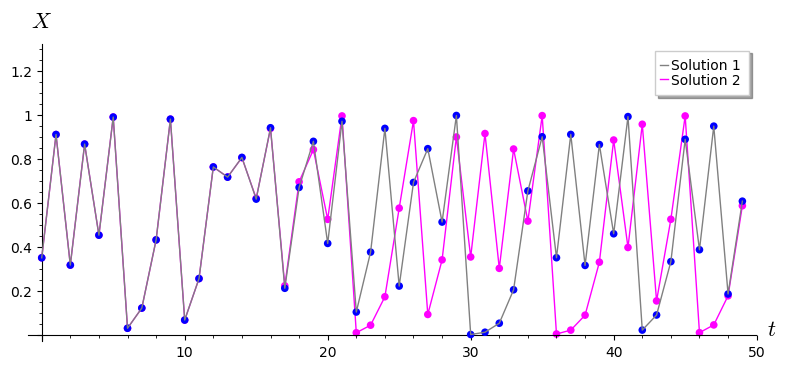

In [20]:
t_list = srange(1000)
X_list1 = [0.3521729]
X_list2 = [0.3521728]
for t in t_list:
    X_list1.append(X_next(X_list1[-1]))
    X_list2.append(X_next(X_list2[-1]))
list_of_points1 = list(zip(t_list, X_list1))
list_of_points2 = list(zip(t_list, X_list2))

print("Solution 1's starting state: {}".format(float(X_list1[0])))
print("Solution 2's starting state: {}".format(float(X_list2[0])))
p  = list_plot(list_of_points1[:50], color="blue", size=30, zorder=3)
p += list_plot(list_of_points1[:50], plotjoined=True, color="gray", zorder=3, legend_label="Solution 1")
p += list_plot(list_of_points2[:50], color="fuchsia", size=30)
p += list_plot(list_of_points2[:50], plotjoined=True, color="fuchsia", legend_label="Solution 2")
p.show(ymin=0, ymax=1.3, axes_labels=("$t$", "$X$"), aspect_ratio=0.4*50/1.3, figsize=8)


**Conclusions: The defining properties of chaotic behavior**

1. The *model* is ***deterministic***: the current state determines all future states; i.e. there is no randomness in the model. 
2. The behavior is ***bounded***: none of the state variables go to ∞. 
3. The behavior is ***irregular*** (or ***aperiodic***): it never repeats itself, nor does it asymptotically approach a periodic cycle. 
4. The behavior has ***sensitive dependence on initial conditions***: a *tiny* difference in two initial states will grow into a *much bigger* difference eventually. 
